Social Network Analysis for the txt data

In [17]:
import networkx as nx
import pandas as pd
%matplotlib inline

In [ ]:
import networkx as nx
# specify the file location
file_name = r"FilePath.txt" # File Path for Folder 

# read an edge list into a networkx graph
g = nx.read_edgelist(file_name, # file location
                     comments="#", # the character used to indicate the start of a comment
                     delimiter="\t", # the character that separates values in a line
                     create_using=nx.Graph() # create as undirected graph
                    )

In [19]:
# printing info(g)
print(nx.info(g))

Graph with 36692 nodes and 183831 edges


<ipython-input-19-25600327f906>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(g))


In [20]:
# print density of network
print(nx.density(g))

0.00027309755503535


In [ ]:
# compute node degrees of a graph
degree = nx.degree(g)

# convert it to pandas dataframe
df_degree = pd.DataFrame([x for x in degree], columns=["node", "degree"])
# sort nodes by degree in descending order
df_degree = df_degree.sort_values("degree", ascending=False)
print(df_degree)

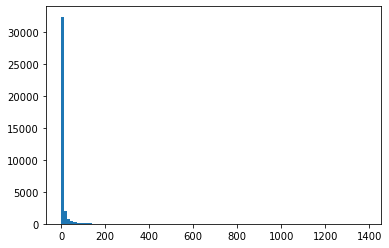

In [22]:
# degree histogram
from matplotlib import pyplot as plt
plt.hist([y for (x, y) in degree], bins=100);

In [23]:
# Number of connected components in the network
components = list(nx.connected_components(g))
print("Number of components:", len(components))
print()

# Number of nodes & edges in the largest component
nodes=0
for item in components:
    if len(item) > nodes:
        nodes = len(item)
        largest_comp = g.subgraph(item)
       
print("Number of nodes:  ",largest_comp.number_of_nodes())
print("Number of edges:  ",largest_comp.number_of_edges())

Number of components: 1065

Number of nodes:   33696
Number of edges:   180811


In [24]:
for item in components:
    if len(item)==16:
        comp_A = g.subgraph(item)
    if len(item)==14:
        comp_B = g.subgraph(item)

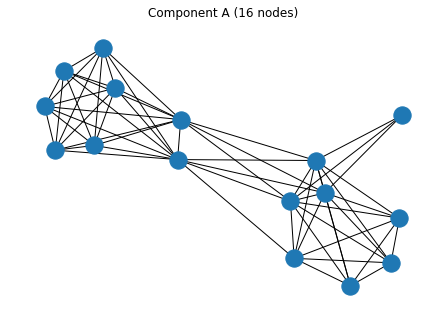

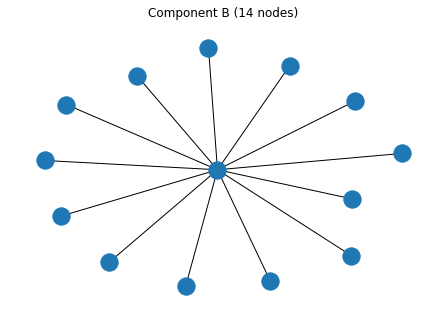

In [25]:
nx.draw_spring(comp_A)
plt.title("Component A (16 nodes)")
plt.show()


nx.draw_spring(comp_B)
plt.title("Component B (14 nodes)")
plt.show()

2.0


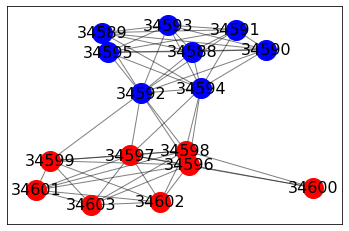

[('34598', 0), ('34594', 1), ('34589', 1), ('34602', 0), ('34590', 1), ('34588', 1), ('34592', 1), ('34600', 0), ('34591', 1), ('34599', 0), ('34593', 1), ('34601', 0), ('34596', 0), ('34597', 0), ('34603', 0), ('34595', 1)]


In [26]:
# in order to run the louvain community detection algorithm, you need to Anaconda Prompt and type:
# pip install --upgrade --force-reinstall python-louvain (please right click Anaconda powershell prompt and select run as an administrator )
import community
partition = community.best_partition(comp_A)
#drawing
size = float(len(set(partition.values())))
print(size)
pos = nx.spring_layout(comp_A)
count = 0
colors = ["r", "b", "y"]
for com in set(partition.values()) :  
    list_nodes = [nodes for nodes in partition.keys()if partition[nodes] == com]
    nx.draw_networkx_nodes(comp_A, pos, list_nodes, node_size = 400, node_color = colors[count])
    labels = {}    
    for node in list_nodes:
        #set the node name as the key and the label as its value 
        labels[node] = node # in our example, for each note (e.g, node "a"), we print the same lable (e.g., a)
    #Now only add labels to the nodes you require (the hubs in my case)
    nx.draw_networkx_labels(comp_A,pos,labels,font_size=16,font_color='k')
    count += 1
nx.draw_networkx_edges(comp_A, pos, alpha=0.5)
plt.show()
values = [(node, partition.get(node)) for node in comp_A.nodes()]
print(values)

In [27]:
# find cliques
for cliq in nx.find_cliques(comp_A):
    print(cliq)

['34602', '34598', '34599', '34603', '34601', '34596', '34597']
['34592', '34594', '34598', '34596', '34597']
['34592', '34594', '34589', '34588', '34591', '34593', '34590', '34595']
['34592', '34599', '34598', '34596', '34597']
['34600', '34598', '34596', '34597']


In [28]:
largest = 0
for cliq in nx.find_cliques(comp_A):
       if len(cliq) > largest: 
          largest = len(cliq)

In [29]:
print(largest)

8


In [30]:
# compute node betweenness of a graph
between = nx.betweenness_centrality(comp_A)
# convert it to pandas dataframe
df_between = pd.DataFrame(list(between.items()), columns=["node", "betweenness"])
# sort nodes by betweenness in descending order
df_between = df_between.sort_values("betweenness", ascending=False)
print(df_between)

     node  betweenness
6   34592     0.271769
1   34594     0.187755
0   34598     0.106122
12  34596     0.106122
13  34597     0.106122
9   34599     0.031633
2   34589     0.000000
3   34602     0.000000
4   34590     0.000000
5   34588     0.000000
7   34600     0.000000
8   34591     0.000000
10  34593     0.000000
11  34601     0.000000
14  34603     0.000000
15  34595     0.000000


In [31]:
# compute node closeness of a graph
closeness = nx.closeness_centrality(comp_A)

# convert it to pandas dataframe
df_closeness = pd.DataFrame(list(closeness.items()), columns=["node", "closeness"])

# sort nodes by closeness in descending order
df_closeness=df_closeness.sort_values("closeness", ascending=False)
print(df_closeness)

     node  closeness
6   34592   0.789474
1   34594   0.750000
0   34598   0.714286
12  34596   0.714286
13  34597   0.714286
9   34599   0.652174
2   34589   0.555556
4   34590   0.555556
5   34588   0.555556
8   34591   0.555556
10  34593   0.555556
15  34595   0.555556
3   34602   0.500000
11  34601   0.500000
14  34603   0.500000
7   34600   0.454545


In [32]:
# compute node eigenvector centrality of a graph
eigen = nx.eigenvector_centrality(comp_A)

# convert it to pandas dataframe
df_eigen = pd.DataFrame(list(eigen.items()), columns=["node", "eigenvector centrality"])

# sort nodes by eivenvector centrality in descending order
df_eigen=df_eigen.sort_values("eigenvector centrality", ascending=False)
print(df_eigen)

     node  eigenvector centrality
6   34592                0.368005
1   34594                0.343403
0   34598                0.267535
12  34596                0.267535
13  34597                0.267535
2   34589                0.252391
4   34590                0.252391
5   34588                0.252391
8   34591                0.252391
10  34593                0.252391
15  34595                0.252391
9   34599                0.216954
14  34603                0.175224
3   34602                0.175224
11  34601                0.175224
7   34600                0.102653
